<a href="https://colab.research.google.com/github/HikariZasureiya/HLV25FinanceScript/blob/main/HLV_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHENTICATE COLAB WITH GOOGLE DRIVE 👾**

In [44]:
from google.colab import auth
import requests
import json
from google.colab import userdata
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# **FUNCTIONS HERE 🛠**

In [46]:
def check_pay_status(sheetno: int, nameworksheet, sheetname: str):
    values = nameworksheet.get_all_values()

    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)


    count = 0
    for status in df['PAID']:
        if str(status).strip().upper() == 'Y':
            count += 1

    print(f'Dept: {sheetname}  Paid: {count} / {len(df)}')

In [47]:
def check_roll(proll , nameworksheet , sheetno):
  arr = []
  for i in range(sheetno):
    d={}
    values = nameworksheet[i].get_all_values()
    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)
    try:
      for idx, roll in enumerate(df['ROLL_NUMBER']):
        roll = str(roll).strip()
        d[roll] = df.loc[idx , 'PAID']
      arr.append(d)
    except Exception as e:
      print('error' , e)

  found = False
  for i in arr:
        if proll in i:
            print(proll, i[proll])
            found = True
            break
  if not found:
      print(proll, 'not found')

In [48]:
def tpontp(rolltostream , nameworksheet , sheetno):
  arr = []
  for i in range(sheetno):
    d={}
    values = nameworksheet[i].get_all_values()
    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)
    try:
      for idx, roll in enumerate(df['ROLL_NUMBER']):
        roll = str(roll).strip()
        d[roll] = df.loc[idx , 'PAID']
      arr.append(d)
    except Exception as e:
      print('error' , e)

  for proll in rolltostream:
    found = False
    for i in arr:
        if proll in i:
            print(proll, i[proll])
            found = True
            break
    if not found:
        print(proll, 'not found')




In [49]:
def not_placed(rolltostream , nameworksheet , sheetno):
  arr = []
  for i in range(sheetno):
    d={}
    values = nameworksheet[i].get_all_values()
    headers = [h.strip().upper() for h in values[0]]
    df = pd.DataFrame(values[1:], columns=headers)
    try:
      for idx, roll in enumerate(df['ROLL_NUMBER']):
        roll = str(roll).strip()
        d[roll] = df.loc[idx , 'PAID']
      arr.append(d)
    except Exception as e:
      print('error' , e)

  for proll in rolltostream:
    found = False
    for i in arr:
        if proll in i:
            found = True
            break
    if not found:
        print(proll)

In [50]:
def findit(rolltostream :dict ,sheetno :int , nameworksheet ,sheetname :str):
    values = nameworksheet.get_all_values()
    df = pd.DataFrame(values[1:], columns=values[0])
    tylis = pd.DataFrame(df)

    count = 0
    try:
      for idx, roll in enumerate(tylis['ROLL_NUMBER']):
        try:
          roll = str(roll).strip()
          if pd.notna(roll) and roll in rolltostream:
            count +=1
            # print(f"Sheet {sheetno+1} ➜", idx, roll)
        except Exception as e:
          print(e)
          print(f'inner exception')
    except Exception as e:
        print(e)
        print(f'error in sheet {sheetno} , {sheetname}')
    return count
    # print(f'Dept: {sheetname}  Paid: {count} / {len(df)}')

In [51]:
def writeit(rolltostream :dict ,sheetno :int , nameworksheet ,sheetname :str):
    values = nameworksheet.get_all_values()
    df = pd.DataFrame(values[1:], columns=values[0])
    tylis = pd.DataFrame(df)
    try:
      for idx, roll in enumerate(tylis['ROLL_NUMBER']):
        roll = str(roll).strip()
        if pd.notna(roll) and roll in rolltostream and  tylis.loc[idx , 'PAID'] != 'Y':
          print(f"not found in: Sheet {sheetno+1} ➜", idx, roll)
          row_num = idx+2
          nameworksheet.update_cell(row_num, 3, 'Y')
          nameworksheet.update_cell(row_num, 4, rolltostream[roll][1])
        elif  pd.notna(roll) and roll in rolltostream and tylis.loc[idx , 'PAID'] == 'Y':
          print(f"already paid in: Sheet {sheetno+1} ➜", idx, roll)


    except Exception as e:
        print(e)
        print(f'error in sheet {sheetno} , {sheetname}')

In [52]:
def ocr_space_url(url, overlay=False,language='eng'):
    api_key = userdata.get('ocrkey')
    payload = {'url': url,
               'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               }
    r = requests.post('https://api.ocr.space/parse/image',
                      data=payload,
                      )
    return r.content.decode()

In [53]:
def retparjson(ocrdata):
  return ocrdata['ParsedResults'][0]['ParsedText']

# **MAIN ✈🏢🏢**





In [54]:
import pandas as pd
from openpyxl import load_workbook
import datetime
print("last executed" , datetime.datetime.now() , "\n")
#opens hlv'25 collection spreadsheet
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1s-E2MnVyXGZSobcnaZ4SqJba0Tao4B2Zdoux6-vu4ZU/edit?gid=1018150263#gid=1018150263")
worksheet = sheet.worksheets()[0]
data = worksheet.get_all_records()
fin = pd.DataFrame(data)
rolltostream ={}

count = 0
for idx , roll in enumerate(fin['University Roll No']):
    roll = str(roll).strip()
    # print(roll)
    count+=1
    temp = ''
    if roll in rolltostream:
      print(roll)

    if(fin.loc[idx , 'Food Preference'] == 'Non Veg'):
        temp = 'NON-VEG'
    elif(fin.loc[idx , 'Food Preference'] == 'Veg'):
        temp = 'VEG'
    rolltostream[str(roll)] = [ 'https://drive.google.com/uc?export=view&id='+(str(fin.loc[idx , 'Payment Screenshot'])).split('=')[1] , str(fin.loc[idx , 'Transaction ID']) ,str(fin.loc[idx , 'VERIFIED'])]
recievedno = len(rolltostream)
print(rolltostream)
print(count)

last executed 2025-05-02 22:53:46.349473 

{'13000123103': ['https://drive.google.com/uc?export=view&id=1C8c07Nkj8gkUJcK_hodIvjq13Zt_LnU_', 'srinjoybasu298@oksbi', 'N'], '13000123101': ['https://drive.google.com/uc?export=view&id=1SHMlHe4pbaFuTFLIJCDr6cgFE7g7q4sy', '509241938329', 'Y'], '13000123117': ['https://drive.google.com/uc?export=view&id=11kSIVyovJZhSg1fJI3FhGL0UGFQ-jcsK', '509245558506', 'Y'], '13000124121': ['https://drive.google.com/uc?export=view&id=1mhTnWd75U16wnnFGd2kB6dT6-wxq5kVA', '509246637211', 'Y'], '13000123124': ['https://drive.google.com/uc?export=view&id=17yojtSPeiqU9GlmuQrz8KgHeOs8ItH1y', 'T2504031618153621119501', 'Y'], '13000123095': ['https://drive.google.com/uc?export=view&id=1pA1TMpvV6bg8QgHSP27eX__h831GRfgc', '509315040280', 'Y'], '13000123067': ['https://drive.google.com/uc?export=view&id=1kk6vns2TySx2tguXdf8brwBJ2ktiitkj', '509376550949', 'Y'], '13000123113': ['https://drive.google.com/uc?export=view&id=1HroYr7EYWMrtBYahIpqlfkFOB65Xtwdh', '509390488058',

# **find placed vs total responses 👽**

In [55]:
namelist = gc.open_by_url("https://docs.google.com/spreadsheets/d/1We74wo0hkN73b2Wa3hqtgoqnNAGFtPjls4_NiwkRGwc/edit?gid=1031123412#gid=1031123412")
nameworksheet = namelist.worksheets()
sheetno = len(nameworksheet)
placed = 0
for i in range(0,sheetno):
  tempo = findit(rolltostream , i , nameworksheet[i] , nameworksheet[i].title)
  placed += tempo
print(f'Total Placed: {placed} / {recievedno}')

Total Placed: 202 / 202


# **Run this to modify the sheet(Check stuff a bit too if you can) ⏰**

In [56]:
# execute to modify sheet (make sure if the sheet has okay format first)
for i in range(0,sheetno):
  writeit(rolltostream , i , nameworksheet[i] , nameworksheet[i].title)

already paid in: Sheet 1 ➜ 30 13000124029
already paid in: Sheet 1 ➜ 39 13000124038
already paid in: Sheet 1 ➜ 40 13000124039
already paid in: Sheet 1 ➜ 41 13000124040
already paid in: Sheet 1 ➜ 43 13000124042
already paid in: Sheet 1 ➜ 45 13000124044
already paid in: Sheet 1 ➜ 49 13000124048
already paid in: Sheet 1 ➜ 50 13000124049
already paid in: Sheet 1 ➜ 51 13000124050
already paid in: Sheet 1 ➜ 52 13000124051
already paid in: Sheet 1 ➜ 54 13000124053
already paid in: Sheet 1 ➜ 58 13000124057
already paid in: Sheet 2 ➜ 0 13000124059
already paid in: Sheet 2 ➜ 1 13000124060
already paid in: Sheet 2 ➜ 2 13000124061
already paid in: Sheet 2 ➜ 3 13000124062
already paid in: Sheet 2 ➜ 4 13000124063
already paid in: Sheet 2 ➜ 11 13000124070
already paid in: Sheet 2 ➜ 12 13000124071
already paid in: Sheet 2 ➜ 14 13000124073
already paid in: Sheet 2 ➜ 16 13000124075
already paid in: Sheet 2 ➜ 20 13000124079
already paid in: Sheet 2 ➜ 21 13000124080
already paid in: Sheet 2 ➜ 22 130001240

# List no. of payment / tot. students  

In [57]:
#check for payment status of all depts
for i in range(0,sheetno):
  check_pay_status(i , nameworksheet[i] , nameworksheet[i].title)

Dept: 1Y - CSE -A  Paid: 13 / 60
Dept: 1Y - CSE - B  Paid: 31 / 60
Dept: 1Y -CSE-C  Paid: 8 / 36
Dept: 2Y - CSE- A  Paid: 11 / 71
Dept: 2Y - CSE- B  Paid: 42 / 70
Dept: 3Y - CSE - A  Paid: 19 / 69
Dept: 3Y - CSE- B  Paid: 15 / 72
Dept: 1Y - CSBS  Paid: 31 / 74
Dept: 2Y - CSBS  Paid: 8 / 61
Dept: 3Y - CSBS  Paid: 7 / 65
Dept: DCST2nd  Paid: 3 / 60
Dept: DCST4th  Paid: 32 / 60


# check status of rollno in response against sheet
# **use caution while executing. might rate limit api usage** ☠

In [58]:
# check status of rollno in response against sheet
# use caution while executing. might rate limit api usage
tpontp(rolltostream , nameworksheet , sheetno)

13000123103 Y
13000123101 Y
13000123117 Y
13000124121 Y
13000123124 Y
13000123095 Y
13000123067 Y
13000123113 Y
13031124051 Y
13000123110 Y
13000123090 Y
13000123105 Y
13000124159 Y
13000123018 Y
13000123052 Y
13000122039 Y
13000124040 Y
13000124049 Y
13000123062 Y
13000124038 Y
13000124057 Y
13000123084 Y
13000123029 Y
13000124167 Y
13000124155 Y
13000124160 Y
13000122008 Y
13000122124 Y
13000123104 Y
13000123063 Y
13000124158 Y
13000124163 Y
13000123083 Y
13000123106 Y
13000123108 Y
13000123118 Y
13000123099 Y
2320071001 Y
13000124162 Y
13000123082 Y
13000123114 Y
13000123109 Y
13000123116 Y
13000123102 Y
13000123088 Y
13000123112 Y
13000123123 Y
13000124087 Y
13031124040 Y
13000122101 Y
13000123098 Y
13031123024 Y
13000122120 Y
13031123056 Y
13031122017 Y
13031123002 Y
13031124069 Y
13000123071 Y
13000123012 Y
13000123054 Y
13000124138 Y
13000124144 Y
13031123013 Y
13000122121 Y
13000122115 Y
13000122070 Y
13000122093 Y
13000122080 Y
13000122098 Y
13000123022 Y
13031123055 Y
1303112

In [38]:
#guys who didn't get placed in the sheet
not_placed(rolltostream , nameworksheet , sheetno)

In [ ]:
#check if rollno present
# use caution while executing. might rate limit api usage
rollinp = input()
check_roll(rollinp , nameworksheet , sheetno)

# Will take a long while to execute and might stop working if rate limited. Use **caution**

In [59]:
'''{'ParsedResults':
    [{'TextOverlay':
         {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'},
          'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': '?250.oo\r\nPaid to Samyak\r\nitechsamyak-l@oksbi\r\n8 April 2025, 1:28 am\r\nUPI transaction D: 546404484342\r\n', 'ErrorMessage': '', 'ErrorDetails': ''}],
          'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '4703', 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}
''' #response json structure

ocrdata = test_url = ocr_space_url(url='https://drive.google.com/uc?export=view&id=1Jyv9egxvu')
#return json
ocrroll = set()
errocrroll = set()
for roll in rolltostream:
  try:
    if rolltostream[roll][2] == 'N' or rolltostream[roll][2] == '':
      test_url = ocr_space_url(url=rolltostream[roll][0])
      try:
          ocrdata = json.loads(test_url)
          ret = retparjson(ocrdata)
          print(roll)
          print(ret)
          if rolltostream[roll][1] in ocrroll or rolltostream[roll][1] in errocrroll:
            print('already exists' , roll)
            raise Exception("someone tried using someone else's transaction id")
          if rolltostream[roll][1] in ret:
            print('\n found ' , roll , rolltostream[roll][1])
            ocrroll.add(roll.strip())
          else:
            print('\n not found ' , roll)
            errocrroll.add(roll.strip())
      except Exception as e:
          print(f"Something went wrong: {e}" , roll)
          errocrroll.add(roll.strip())
  except Exception as e:
      print(f"Something went wrong: {e}" , roll)
      errocrroll.add(roll.strip())



13000123103
2:54
p
To Samyak
+91 97759 48268
050
Pay again
e Completed
2 Apr 2025, 2:50 pm
State Bank of India 7300
UPI transaction ID
102472997008
To: SAMYAK MISHRA
Google Pay • itechsamyak-l@oksbi
From: Srinjay Basu (State Bank of India)
Google Pay • srinjoybasu298@okhdfcbank
Google transaction ID
CICAgMid603ULw
< Share
laving issues?
Split with friends


 not found  13000123103
13000124057
10:09 PM o M
SM
Payment Successful
07 April 2025 at 10:08 PM
SAMYAK MISHRA
itechsamyak-l@oksbi
e250
View Details
Milestone Achieved!
Split Expense
Share Receipt
1 CRORE* App Downloads
share.
market
A • PhmePeProduct —
-1
Done


 not found  13000124057
13000122008
1:12 AM 1.9KB/s
O
Self transfer
050
e Transferred
8 Apr 2025, 1:12 am
.,lll
State Bank of India
5264
UPI transaction ID
509866940299
To: Airtel Payments Bank
8268
Google Pay • itechsamyak-l@okhdfcbank
From: State Bank of India
5264
Google Pay • itechsamyak@okaxis
Google transaction ID
CICAgMjD50-iRQ
Payments may take up to 3 working days 

In [60]:
#update the DONATION SHEET (modify with caution)

print('ocrroll ' , ocrroll)
print('errocrroll ', errocrroll)

for idx , roll in enumerate(fin['University Roll No']):
    try:
      roll = str(roll).strip()
      if roll in ocrroll:
        row_num = idx+2
        worksheet.update_cell(row_num, 13, 'Y')
    except Exception as e:
      print(e)
      print(f'error in sheet {sheetno}')

ocrroll  {'13000124044', '13031124068', '2320971029', '2320071041', '13000124051', 'D232431113', 'D242506912', '13000124101', '13031122053', '13031124055', '13000124105', '13000122082', '2220071008', '13000124099', '13000124053', '13031124047', '13031124074', '13000124089', '13031124010', '13000124092', '13000122020', '13031124003', '2320071030', '13000124062', '13000124118', '13030522017', 'D232431100', '13000122001', '13000124139', '2320071026', '13000124090', '13031124057', '13000124029', '13000124106', '13000124059', '13031124050', '13031124033', '13031124044', '2220076008', '13000124070', '13000124091', '2320071043', '2320071047', '13031124006', '2420076008', '13031124013'}
errocrroll  {'13000123099', '13000122015', '13000222009', '13000124082', '13000124057', '13000123123', '13031124065', 'D232431121', '13031124039', 'D232431084', '13031124073', '13000122115', '13000124083', '13000124087', '13031124045', '13000124102', '13000123120', '13000124050', '13000124109', '13000124042', '

# **Honourable Mentions**
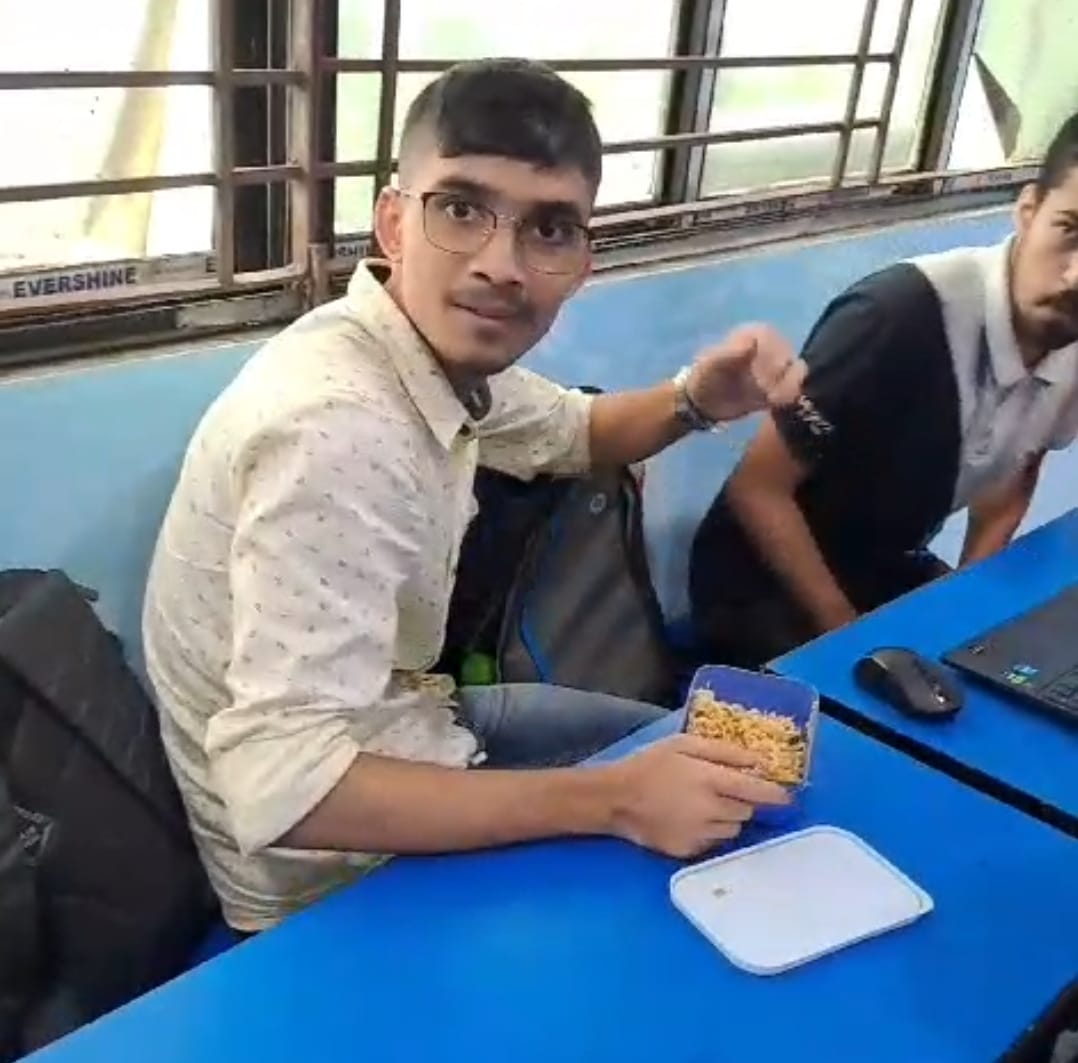



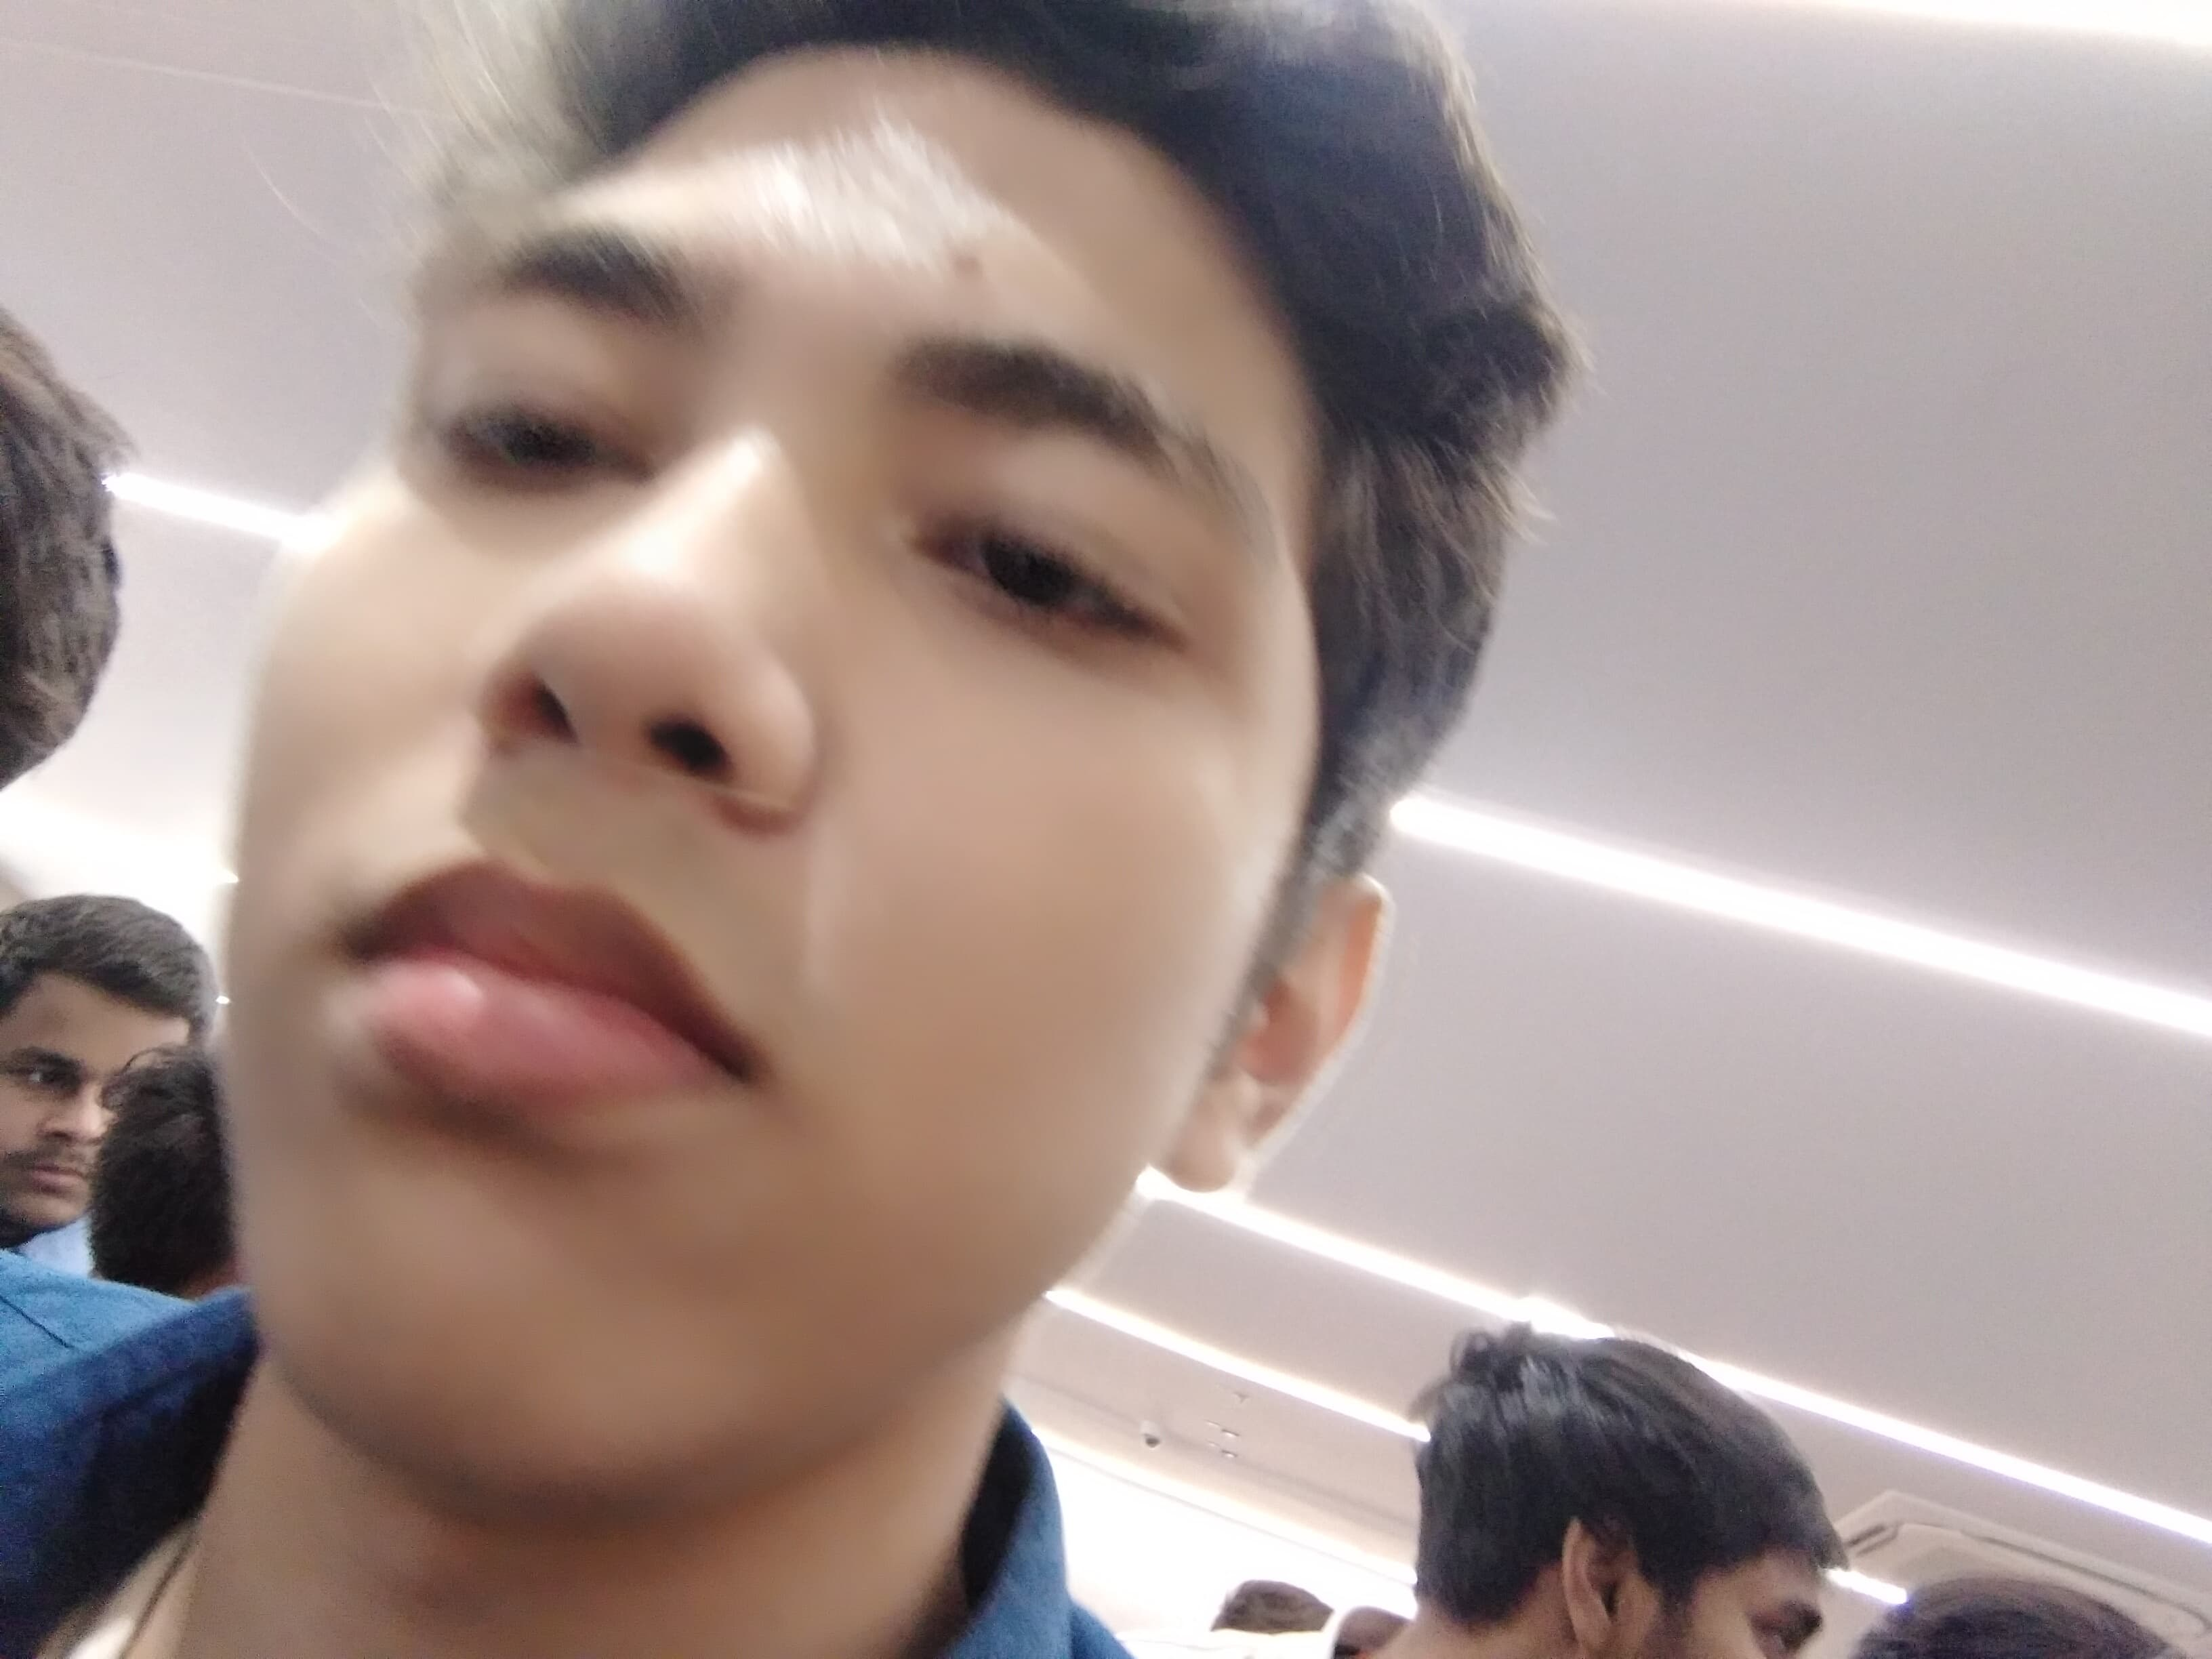